In [519]:
#include necessary packages
using Distributions
using PyPlot

In [523]:
#generate toy-data
#three clusters, one null cluster, two signals 

#n by n grid 
#k clusters of signals, the rest are all null   

#point = (xloc, yloc, p-value)
n = 1000; 
k = 10; 

null_dist = Uniform(0,1);
dataSet = zeros(n,n);

#generate k centers randomly
center_vec = Tuple{Int,Int}[]
for(i in 1:k)
    center = (rand(DiscreteUniform(1,n)), rand(DiscreteUniform(1,n)));
    while(center in center_vec) center = (rand(DiscreteUniform(1,n)), rand(DiscreteUniform(1,n))); end
    push!(center_vec, center); 
end

#generate k Beta distributions randomly 
betas = Float64[];
#alpha = 1/beta so only need to store one parameter
for(i in 1:k)
    push!(betas, rand(Uniform(1,10)))
end


#given the center of a cluster 
#returns a randomly selected cluster 
function getCluster(center, n, radius)
    cluster = Tuple{Int,Int}[];
    for(i in -radius:radius)
        for(j in -radius:radius)
            x = center[1] + i
            y = center[2] + j
            if(x < 1 || x > n || y < 1 || y > n) continue end;
            #flip a coin weighted by distance from center of cluster to determine inclusion
            dst = norm([i,j], 2)/norm([radius,radius],2)
           # println(dst)
            p = rand(Uniform(0,1))
            if(p < (1-dst + 0.1))
                push!(cluster, (x,y))
            end
        end
    end
    return cluster
end

#generate k clusters with given radius 
cluster_arr = Array{Tuple{Int,Int},1}[];
radius = 20; 
for(i in 1:k)
    push!(cluster_arr, getCluster(center_vec[i], n, radius))
end


#generate dataset
for(i in 1:n)
    for(j in 1:n)
        is_null = true;
        for(z in 1:k)
            cluster = cluster_arr[z];
            beta = betas[z];
            beta_dist = Beta(1/beta,beta);
            if((i,j) in cluster)
                is_null = false; 
                dataSet[i,j] = rand(beta_dist);
            end
        end
        if(is_null) dataSet[i,j] = rand(null_dist); end
    end
end

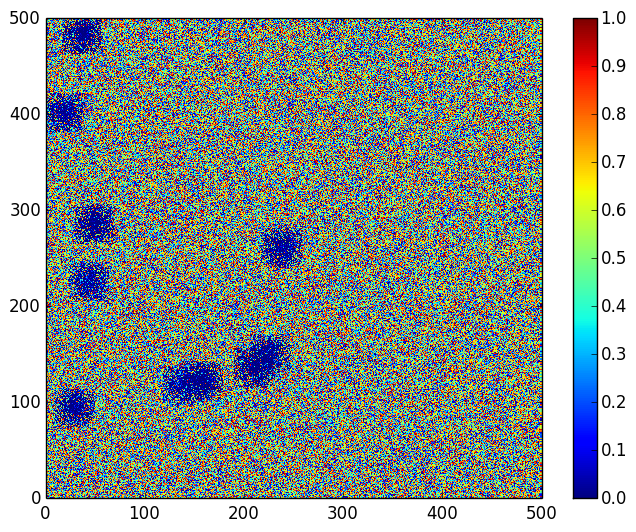

PyObject <matplotlib.colorbar.Colorbar instance at 0x334744488>

In [521]:
pcolormesh(dataSet)
colorbar()


500x500 Array{Float64,2}:
 0.928644   0.953571    0.470784   …  0.0731869  0.279385    0.530248 
 0.850323   0.317392    0.495471      0.73206    0.546082    0.159121 
 0.0307081  0.0274177   0.989539      0.287938   0.258436    0.915035 
 0.787903   0.963426    0.142589      0.891172   0.153208    0.105413 
 0.490855   0.0258791   0.483927      0.531011   0.0633104   0.110493 
 0.923923   0.861771    0.912063   …  0.757259   0.193799    0.195147 
 0.396241   0.067837    0.423314      0.692663   0.640312    0.445752 
 0.655181   0.425796    0.0952619     0.619903   0.8966      0.440753 
 0.223255   0.436791    0.598421      0.86767    0.76218     0.553788 
 0.169841   0.620991    0.732435      0.147051   0.467011    0.0434171
 0.904163   0.0939493   0.950166   …  0.888554   0.568682    0.0150591
 0.431225   0.391262    0.225878      0.202693   0.0178902   0.211981 
 0.176057   0.663801    0.990767      0.379523   0.459425    0.984054 
 ⋮                                 ⋱               